In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats

In [2]:
import seaborn as sns
#sns.set()
sns.set(color_codes=True)

In [3]:
def gaussian(x, mean, stdev):
    return np.exp(-((x - mean) ** 2) / (2 * stdev ** 2))/(np.sqrt(2*np.pi)*stdev)

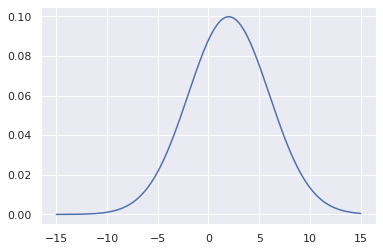

In [4]:
x = np.linspace(-15, 15, 250)
plt.plot(x, gaussian(x, 2, 4))

(0.682689492137086, 7.579375928402476e-15)


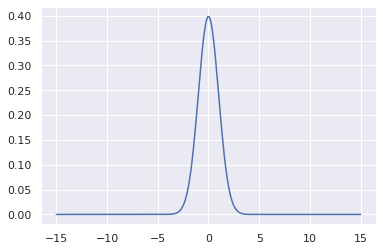

In [5]:
import scipy.integrate as integrate
print(integrate.quad(lambda x: gaussian(x, 0 ,1), -1 , 1))
plt.plot(x, gaussian(x, 0, 1))

Text(0.5, 1.0, 'Area under the curve gives probability -- here 90% probability limits')

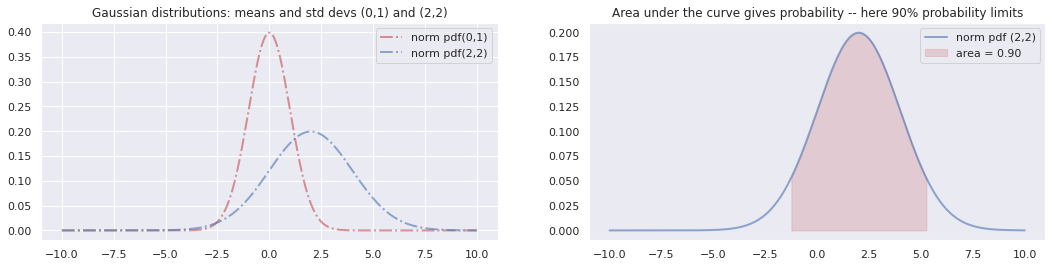

In [6]:
x = np.linspace(-10,10,250)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
ax[0].plot(x, stats.norm.pdf(x), 'r-.', lw=2, alpha=0.6, label='norm pdf(0,1)')
ax[0].plot(x, stats.norm.pdf(x,2,2), 'b-.', lw=2, alpha=0.6, label='norm pdf(2,2)')
ax[0].legend()
ax[0].set_title("Gaussian distributions: means and std devs (0,1) and (2,2)")
x_90_idx= (x > stats.norm.ppf(0.05, 2, 2)) & (x < stats.norm.ppf(0.95, 2, 2))
ax[1].grid(False)
ax[1].plot(x, stats.norm.pdf(x,2,2), 'b-', lw=2, alpha=0.6, label='norm pdf (2,2)')
ax[1].fill_between(x[x_90_idx], stats.norm.pdf(x[x_90_idx],2,2), color='r', alpha=.2, label='area = 0.90')
ax[1].legend()
ax[1].set_title("Area under the curve gives probability -- here 90% probability limits")

In [7]:
(x_lo, x_hi) = (stats.norm.ppf(0.05, 2, 2), stats.norm.ppf(0.95, 2, 2))
print("Range of x-values that account for 90% of probability of occurrence = (", x_lo, "," , x_hi, ")")
print("Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).")

Range of x-values that account for 90% of probability of occurrence = ( -1.2897072539029457 , 5.289707253902945 )
Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).


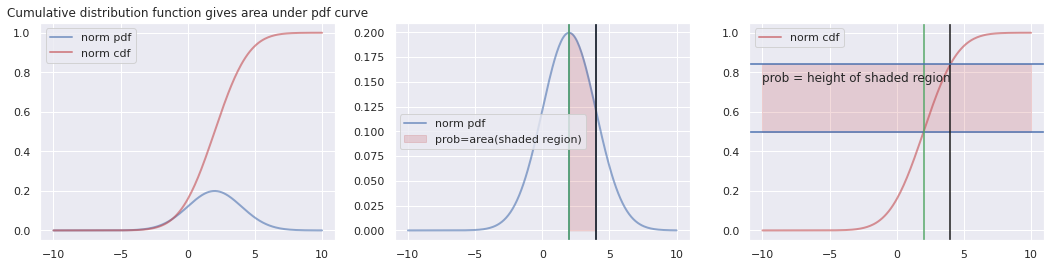

In [8]:
x = np.linspace(-10, 10, 250)
x1 = np.linspace(3, 4, 50)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf')
ax[0].plot(x, stats.norm.cdf(x, 2, 2), 'r-', lw=2, alpha=0.6, label='norm cdf')
ax[0].set_title("Cumulative distribution function gives area under pdf curve")
ax[0].legend()
ax[1].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf')
x1 = np.linspace(2, 4, 50) # want to graphically 
ax[1].axvline(2)
ax[1].axvline(4)
ax[1].fill_between(x1, stats.norm.pdf(x1, 2, 2), color='r', alpha=.2, label='prob=area(shaded region)')
ax[1].legend()
ax[2].plot(x, stats.norm.cdf(x, 2, 2), 'r-', lw=2, alpha=0.6, label='norm cdf')
# put vertical and horizontal lines at x=2, pdf(x=2)
ax[1].axvline(2, color = 'g')
ax[1].axvline(4, color = 'k')
y_2 = stats.norm.cdf(2,2,2)
ax[2].axhline(y_2)
# put vertical and horizontal lines at x=4, pdf(x=4)
ax[2].axvline(2, color = 'g')
ax[2].axvline(4, color = 'k')
y_4 = stats.norm.cdf(4,2,2)
ax[2].axhline(y_4)
ax[2].text(-10,.75,"prob = height of shaded region")

ax[2].fill_between(x, y_2, y_4, color='r', alpha=0.2)
ax[2].legend()

In [9]:
delta_xs = [0.1**i for i in range(10)]
for delta_x in delta_xs:
    print(stats.norm.pdf(3.,2,2)*delta_x - (stats.norm.cdf(3.+delta_x, 2, 2) - stats.norm.cdf(3, 2, 2)))

0.026150378587619955
0.00022541440057445572
2.205896692277203e-06
2.2009582686580544e-08
2.2004626755705442e-10
2.2003796248540395e-12
2.1918663767514547e-14
2.7118054282644494e-16
8.262920572069747e-17
3.046738106457288e-17


In [10]:
# Let us return to the women's 100m sprint times and fit a straight line through the data
olympics100f=np.asarray([
0, 11.90,
1, 11.50,
2, 11.50,
3, 11.00,
4, 11.40,
5, 11.08,
6, 11.07,
7, 11.08,
8, 11.06,
9, 10.97,
10, 10.54,
11, 10.82,
12, 10.94,
13, 10.75,
14, 10.93,
15, 10.78,
16, 10.75,
17, 10.71])
odate_f = olympics100f[::2]
otime_f = olympics100f[1::2]

olympics100m = np.asarray([1900,11,
1904,11,
1906,11.2,
1908,10.8,
1912,10.8,
1920,10.8,
1924,10.6,
1928,10.8,
1932,10.3,
1936,10.3,
1948,10.3,
1952,10.4,
1956,10.5,
1960,10.2,
1964,10,
1968,9.95,
1972,10.14,
1976,10.06,
1980,10.25,
1984,9.99,
1988,9.92,
1992,9.96,
1996,9.84,
2000,9.87,
2004,9.85,
2008,9.69,
2012,9.63,
2016,9.81])

odate_m = olympics100m[::2]
otime_m = olympics100m[1::2]

Text(0.5, 1.0, 'The data that the learnt function produces does not look like the real data')

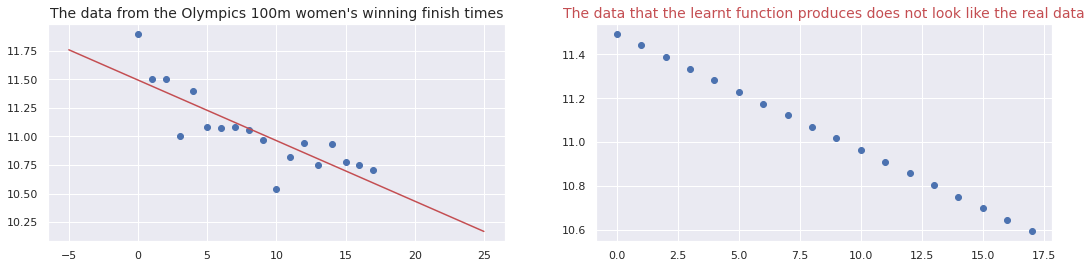

In [11]:
def linear_fit(X, y):
    num = (X*y).mean() - (X.mean()*y.mean())
    den = (X**2).mean() - (X.mean())**2
    w1 = num/den
    w0 = y.mean() - w1*X.mean()
    return w0, w1
w0fit, w1fit = linear_fit(odate_f, otime_f)

def learnt_fn(Xvariable, Xdata, ydata):
    X = Xvariable
    w_hat = linear_fit(Xdata, ydata)
    fn = 0.
    for i in range(len(w_hat)):
        fn += w_hat[i]*X**i
    return fn

x = np.linspace(-5,25,250)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
ax[0].scatter(odate_f, otime_f)
ax[0].plot(x, learnt_fn(x, odate_f, otime_f), c='r')
ax[0].set_title("The data from the Olympics 100m women's winning finish times", fontsize=14)
ax[1].scatter(odate_f, learnt_fn(odate_f, odate_f, otime_f) )
ax[1].set_title("The data that the learnt function produces does not look like the real data", fontsize=14, color='r')

In [12]:
def negloglik_normal(X, y, w0, w, sigma):
    loglik = 0
    for x1, y1 in zip(X,y):
        prediction1 = w0 + np.dot(w, x1)
        residual = y1 - prediction1
        loglik += np.log(stats.norm.pdf(residual, 0, sigma))
    return -loglik


In [13]:
w0best, w1best = linear_fit(odate_f, otime_f) # linear regression fit
w_trial = np.array([[12.0, -.1], [11.5, -.03], [12.5, -.03], [11.0,-.07],  [w0best, w1best]])
for w0, w1 in w_trial:
    nll = negloglik_normal(odate_f, otime_f, w0, w1, .05)
    print((w0,w1), nll)

(12.0, -0.1) 338.2577126737121
(11.5, -0.03) 281.5177126737122
(12.5, -0.03) 5333.517712673712
(11.0, -0.07) 1578.3977126737134
(11.494210526315785, -0.05304437564499428) 83.64962185843893


In [14]:
residuals_f = learnt_fn(odate_f, odate_f, otime_f)-otime_f
residuals_m = learnt_fn(odate_m, odate_m, otime_m)-otime_m


print("Verifying conditions for vanishing of gradient of loss:\nSum of the residuals = ", residuals_f.sum())
print("Sum of product(residual times input): r_n times x_n  = ", odate_f.dot(residuals_f))

Verifying conditions for vanishing of gradient of loss:
Sum of the residuals =  -3.552713678800501e-15
Sum of product(residual times input): r_n times x_n  =  2.4158453015843406e-13


Text(0.5, 1.0, "Histogram of the residuals (women's)")

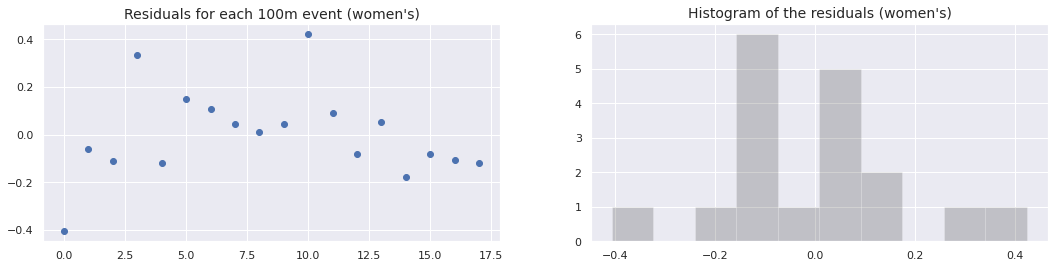

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].scatter(odate_f, residuals_f)
ax[0].set_title("Residuals for each 100m event (women's)", fontsize = 14)
ax[1].hist(residuals_f, color='k',alpha=0.2)
ax[1].set_title("Histogram of the residuals (women's)", fontsize = 14)

Text(0.5, 1.0, "Men's 100m: histogram of residuals and gaussian pdf with same std. dev.")

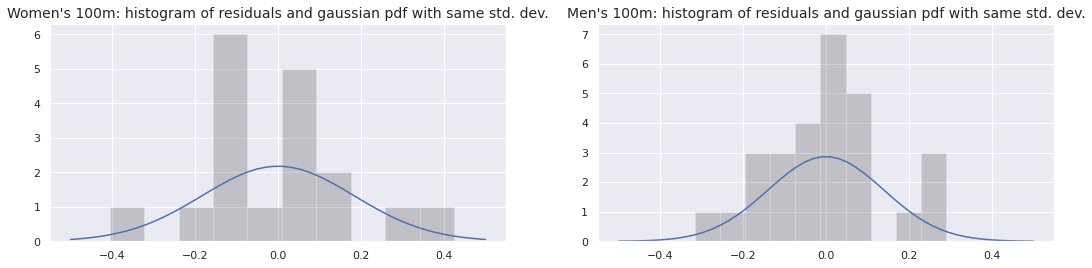

In [16]:
res_sigma_f = np.sqrt(np.square(residuals_f).sum()/len(residuals_f)) # standard deviation of residuals
res_sigma_m = np.sqrt(np.square(residuals_m).sum()/len(residuals_m))
x = np.linspace(-0.5,0.5,50)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x, 0, res_sigma_f), 'b-')
ax[0].hist(residuals_f,color='k',alpha=0.2)
ax[0].set_title("Women's 100m: histogram of residuals and gaussian pdf with same std. dev.", fontsize = 14)
ax[1].plot(x, stats.norm.pdf(x, 0, res_sigma_m), 'b-')
ax[1].hist(residuals_m,color='k',alpha=0.2)
ax[1].set_title("Men's 100m: histogram of residuals and gaussian pdf with same std. dev.", fontsize = 14)

In [17]:
def data_generator(n):
    noise = np.random.normal(0,1,n)
    x = np.linspace(0,1,n)
    y = -2 + 3*x + noise
    return x, y

Text(0, 0.5, 'w_1: slope values learnt')

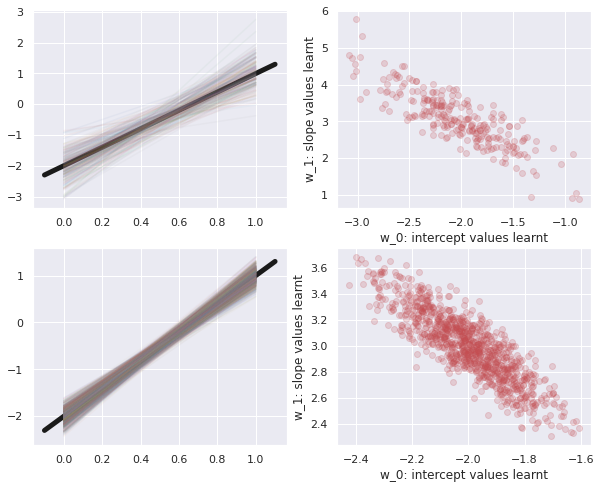

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

X0 = np.linspace(-0.1,1.1,100)
ax[0][0].plot(X0, -2+3*X0, lw = 5, c='k')
X = np.linspace(0,1,100)
l_wts1 = []
l_sig1 = []
for i in range (250):
    Xd, yd = data_generator(20)
    best_fit_w = linear_fit(Xd, yd)
    residuals_w= learnt_fn(Xd, Xd, yd)-yd
    best_fit_sigma = np.sqrt(np.square(residuals_w).sum()/len(residuals_w))
    l_wts1.append(np.asarray(best_fit_w))
    l_sig1.append(best_fit_sigma)
    ax[0][0].plot(X, learnt_fn(X, Xd, yd), alpha=0.05)
l_wts1 = np.asarray(l_wts1)
ax[0][1].scatter(l_wts1[:,0], l_wts1[:,1], alpha=0.2, c='r')
ax[0][1].set_xlabel('w_0: intercept values learnt')
ax[0][1].set_ylabel('w_1: slope values learnt')

ax[1][0].plot(X0, -2+3*X0, lw = 5, c='k')
l_wts2 = []
l_sig2 = []
for i in range(1000): # 1000 data fitting operations
    Xd, yd = data_generator(180) # generate a training sample of SIZE 180
    best_fit_w = linear_fit(Xd, yd)
    residuals_w = learnt_fn(Xd, Xd, yd)-yd
    best_fit_sigma = np.sqrt(np.square(residuals_w).sum()/len(residuals_w))
    l_wts2.append(np.asarray(best_fit_w))
    l_sig2.append(best_fit_sigma)
    ax[1][0].plot(X, learnt_fn(X, Xd, yd), alpha=0.05) # plot light lines (set by alpha, the trasparency parameter)
l_wts2 = np.asarray(l_wts2)
ax[1][1].scatter(l_wts2[:,0], l_wts2[:,1], alpha=0.2, c='r')
ax[1][1].set_xlabel('w_0: intercept values learnt')
ax[1][1].set_ylabel('w_1: slope values learnt')

## Your turn
Apart from the weights, we have also learnt the best-fit standard deviations, sigma stored in the lists l_sig1 and l_sig2. What do they look like? What use are they in making the model generate data that looks like realistic data, unlike the best fit line, as we saw earlier?

### Answer


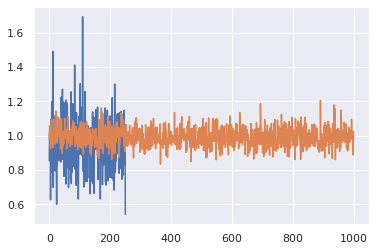

In [19]:
sp_sig1 = np.linspace(0, 250, 250)
plt.plot(sp_sig1, l_sig1)

sp_sig2 = np.linspace(0,1000,1000)
plt.plot(sp_sig2, l_sig2)

With a much larger training sample the best sigma of l_sig2 vary much less. The use of finding the best-fit std dev is so that when generating data the probability of generating the original dataset is at its highest.

# Bayesian Inference - discrete variables
You will work through a few examples that illustrate how Bayesian reasoning works. First, you solve an inference problem of estimating parameters of a probability distribution. Next, you check for the consistency of updating our probabilities as degrees of belief when accumulating evidence based on Bayes' Rule. Finally, the advantage of having a probabilistic approach to modelling data is that it enables you to simulate more data that are distributed like the original data you learned the model from. In this sense, Bayesian models are generative models.

What proportion of the earth's surface is water?
(From "Rethinking Statistics" by Richard McElreath)

You throw a small, but accurately drawn, globe in the air and catch it. Every time your right index finger falls on a blue patch indicating water, you record "W", else, record "L". From a finite sample of globe tosses you wish to infer the proportion of the earth's surface covered with water.

Let the unknown proprtion of water be denoted  θ . The task is to go from the evidence of a finite sample of the form "WLWWWLWLL...." with the event of "W" occurring considered a "success" with probability  θ  and "L" a failure occurring with probability  1−θ .

Below in the posterior_grid_approx function we use Bayes' rule to infer, from the observation of a sequence (of length "tosses" or  N ) containing a number ("success" or  nW ) of occurrences of "W", the likely fraction of planetary water coverage as represented by the globe. For each hypothetical value of this fraction  θ , stored in the p_grid array, the corresponding probability of seeing the observed data using the binomial probability mass function stats.binom.pmf:
(NnW)θnW(1−θ)N−nW

In [20]:
def posterior_grid_approx(grid_points, success, tosses):
    
    p_grid = np.linspace(0,1,grid_points)
    
    prior = np.repeat(1, grid_points)/grid_points
    
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    
    unstd_posterior = likelihood * prior
    
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return p_grid, posterior

In [21]:
def bin(x, n, k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))*(x**k)*(1-x)**(n-k)

point_grid = np.linspace(0,1,6)
print("Are the two lines equal?")
print(bin(point_grid,10,7))
print(stats.binom.pmf(7,10,point_grid))

Are the two lines equal?
[0.         0.00078643 0.04246733 0.21499085 0.20132659 0.        ]
[0.         0.00078643 0.04246733 0.21499085 0.20132659 0.        ]


Max of posterior probability is at the 4-th entry
 with trial parameter theta equal to 0.8 and p(0.8)=0.539


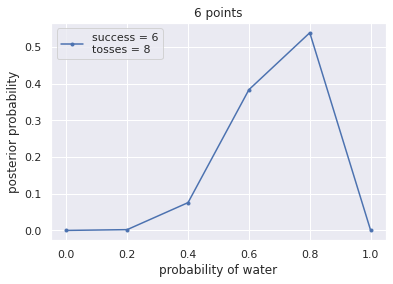

In [22]:
points = 6
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, '.-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);
print('Max of posterior probability is at the {}-th entry\n with trial parameter theta equal to {}\
 and p({})={}'.format(np.argmax(posterior),p_grid[np.argmax(posterior)], 
                      p_grid[np.argmax(posterior)],np.around(np.max(posterior),3)))

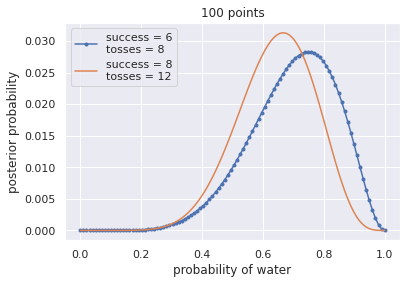

In [41]:
points = 100
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior,'.-', label='success = {}\ntosses = {}'.format(w, n))
w, n = 8, 12
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, '-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);

# Updating probablities using Bayes' Rule

In [42]:
def posterior_grid_from_prior(prior, success, tosses):
    
    grid_points = len(prior)
    p_grid= np.linspace(0,1,grid_points)
    
    prior = prior
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    
    unstd_posterior = likelihood * prior
    
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior
    

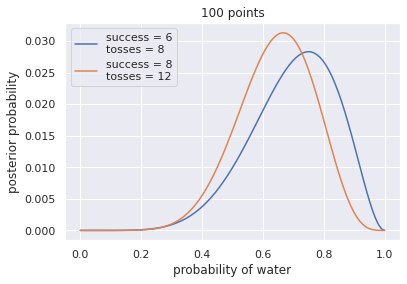

In [45]:
points = 100
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior,'-', label='success = {}\ntosses = {}'.format(w, n))
wnew, nnew = 2, 4 # 2 additional successes from 4 tosses of the globe
p_grid, posterior = posterior_grid_from_prior(posterior, wnew, nnew)
[w, n] = [w+wnew, n+nnew]
plt.plot(p_grid, posterior, '-', label='success = {}\ntosses = {}'.format(w, n)) # updating total counts
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);

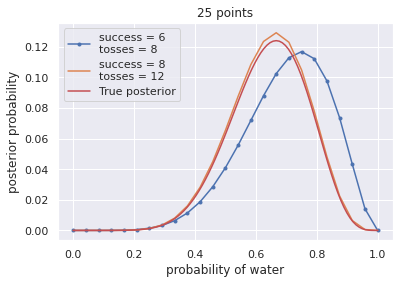

In [55]:

points = 25
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior,'.-', label='success = {}\ntosses = {}'.format(w, n))
wnew, nnew = 2, 4 # 2 additional successes from 4 tosses of the globe
p_grid, posterior = posterior_grid_from_prior(posterior, wnew, nnew)
[w, n] = [w+wnew, n+nnew]
plt.plot(p_grid, posterior, '-', label='success = {}\ntosses = {}'.format(w, n)) # updating total counts
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1)/len(p_grid), c='r', label='True posterior')
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);

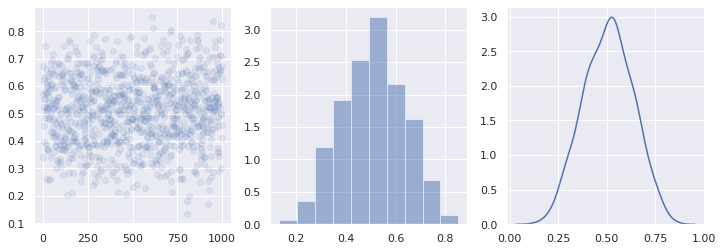

In [68]:
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=12)
nsamples = 1000 # The next line returns nsample data points (an observation of a value of $\theta$)
samples = np.random.choice(p_grid, p=posterior, size=int(nsamples), replace=True) 
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].plot(samples, 'o', alpha=0.1)
ax[1].hist(samples,alpha=.5,density=True) 
sns.kdeplot(samples, ax=ax[2])

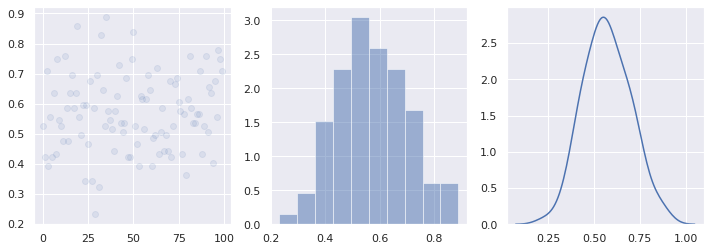